In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense,Activation

C:\Users\User\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.CSRRD7HKRKC3T3YXA7VY7TAZGLSWDKW6.gfortran-win_amd64.dll
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


ImportError: No module named 'numpy.core._multiarray_umath'

In [2]:
xy = np.loadtxt('C:\\실험데이터\\UDDS_lowdata.csv', delimiter=',', dtype=np.float32)
print(xy.shape)

(40, 5)


In [3]:
def minmaxscaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / denominator           
    # noise term prevents the zero division:  (denominator + 1e-7)

In [4]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
ymax, ymin = np.max(y_data), np.min(y_data)
xy = minmaxscaler(xy)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

seq_len = 2
sequence_length = seq_len + 1

result=[]
for index in range(len(xy)-sequence_length):
    result.append(xy[index:index +sequence_length])
    result_data = np.array(result)
result_data.shape

(37, 3, 5)

In [5]:
row=int(round(result_data.shape[0]*0.8))
train=result_data[:row,:]
#np.random.shuffle(train)

X_data = result_data[:,:-1,:-1]
Y_data = result_data[:,-1,-1]
Y_data_real = Y_data*(ymax-ymin)+ymin
print('X_data : ', X_data.shape)
print('Y_data : ', Y_data.shape)

X_train=train[:,:-1,:-1]
Y_train=train[:,-1,-1]
print('X_train : ', X_train.shape)
print('Y_train : ', Y_train.shape)

X_test=result_data[row:,:-1,:-1]
Y_test=result_data[row:,-1,-1]
Y_test_real = Y_test*(ymax-ymin)+ymin
print('X_test : ', X_test.shape)
print('Y_test : ', Y_test.shape)

X_data :  (37, 2, 4)
Y_data :  (37,)
X_train :  (30, 2, 4)
Y_train :  (30,)
X_test :  (7, 2, 4)
Y_test :  (7,)


In [6]:
model=Sequential()
model.add(LSTM(20,return_sequences=False,input_shape=(2,4)))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))
model.compile(loss='mse',optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20)                2000      
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 2,021
Trainable params: 2,021
Non-trainable params: 0
_________________________________________________________________


In [7]:
hist=model.fit(X_train, Y_train,
    validation_data=(X_test, Y_test),
    batch_size=1,
    epochs=30)

Train on 30 samples, validate on 7 samples
Epoch 1/30
30/30 [==============================] - 1s 26ms/step - loss: 0.2092 - val_loss: 0.1120
Epoch 2/30
30/30 [==============================] - 0s 2ms/step - loss: 0.1441 - val_loss: 0.2738
Epoch 3/30
30/30 [==============================] - 0s 2ms/step - loss: 0.1187 - val_loss: 0.2609
Epoch 4/30
30/30 [==============================] - 0s 2ms/step - loss: 0.1125 - val_loss: 0.2263
Epoch 5/30
30/30 [==============================] - 0s 2ms/step - loss: 0.0951 - val_loss: 0.2044
Epoch 6/30
30/30 [==============================] - 0s 1ms/step - loss: 0.0958 - val_loss: 0.1660
Epoch 7/30
30/30 [==============================] - 0s 1ms/step - loss: 0.0839 - val_loss: 0.1437
Epoch 8/30
30/30 [==============================] - 0s 2ms/step - loss: 0.0725 - val_loss: 0.1008
Epoch 9/30
30/30 [==============================] - 0s 1ms/step - loss: 0.0600 - val_loss: 0.0903
Epoch 10/30
30/30 [==============================] - 0s 1ms/step - loss: 0

## training loss ##


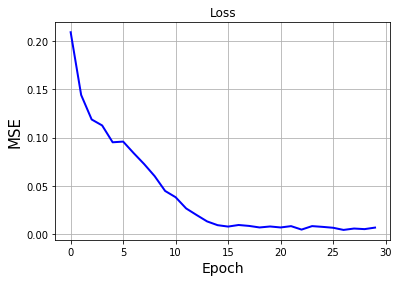

In [8]:
print('## training loss ##')
plt.plot(hist.history['loss'],'b-', linewidth=2.0)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('MSE', fontsize=15)
plt.title('Loss')
plt.grid()

In [9]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=20)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

7/7 [==============================] - 0s 143us/step
## evaluation loss and_metrics ##
0.0015557630686089396


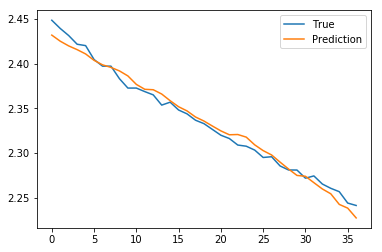

array([[2.4317405],
       [2.4249432],
       [2.4196815],
       [2.415513 ],
       [2.4107184],
       [2.4035878],
       [2.3985672],
       [2.3956764],
       [2.391782 ],
       [2.3861794],
       [2.376717 ],
       [2.3712478],
       [2.370761 ],
       [2.3659594],
       [2.3585043],
       [2.3517716],
       [2.3470933],
       [2.3403056],
       [2.3357954],
       [2.3302104],
       [2.3248158],
       [2.3204832],
       [2.3207707],
       [2.3178427],
       [2.3092334],
       [2.3027852],
       [2.2979286],
       [2.2899346],
       [2.2822824],
       [2.2750962],
       [2.2741446],
       [2.2670076],
       [2.2599902],
       [2.2545805],
       [2.2427602],
       [2.2385814],
       [2.2276592]], dtype=float32)

In [10]:
pred=model.predict(X_data)
pred = pred*(ymax-ymin)+ymin
fig=plt.figure(facecolor='white')
ax=fig.add_subplot(111)
ax.plot(Y_data_real,label='True')
ax.plot(pred,label='Prediction')
ax.legend()
plt.show()
pred

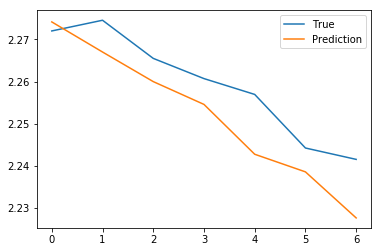

In [11]:
pred=model.predict(X_test)
pred = pred*(ymax-ymin)+ymin
Y_test = Y_test*(ymax-ymin)+ymin
fig=plt.figure(facecolor='white')
ax=fig.add_subplot(111)
ax.plot(Y_test,label='True')
ax.plot(pred,label='Prediction')
ax.legend()
plt.show()

In [12]:
np.mean(abs((Y_test - pred.T)/Y_test)*100)

0.29721767